# A Walkthrough of *Exact Stochastic Simulation of Coupled Chemical Reactions* By Danlel T. Gillespie

## Part 1 - Introduction to plotting in Python

### Learning Goals of Part 1

Our goal for part 1 will be to simply plot a known function in Python. At the end of this section we should be able to write and plot the exponential decay function.

*by Tyler Biggs*

Begin with importing numpy, a math package for python, and matplotlib for plotting the data.

In [1]:
import numpy as np

In [2]:
import matplotlib

In [3]:
matplotlib.use('Agg')

In [4]:
import matplotlib.pyplot as plt

In [5]:
# Ask jupyter to plot in-line.
%matplotlib inline

## Defining the exponential decay functions
The reaction we are modeling is one species decaying into another:

$ A \xrightarrow{c} B $

$A$ is the starting material, and $B$ is the decay product. $c$ is the rate constant, in whatever units of time we would like.

The reason we do this is this system is simple enough that it can be solved exactly, and we can check our work. The simple equations that turn out to model exponential decay are:

$X(t) = X_0e^{-ct}$

In python:

In [6]:
# where:
# X is the initial value
# c is the rate constant
# t is the time range/variable
def exponential_decay(X, c, t):
    # np.exp is e raised to the arguments within ()
    return X * np.exp(-c * t)

# lets make up some variables
A = 1000  # the number of species to simulate
c1 = 0.5  # the decay rate, in arbitrary time units

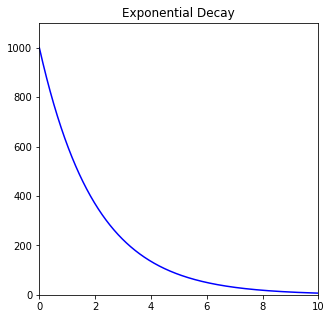

In [7]:
# first we need a time range for the plot.
# np.linspace(a,b,c) creates a range from a to b, with c points in it.
time_range = np.linspace(0, 10, 1000)

# assing an alias to the exponential decay function.
exp = exponential_decay(A, c1, time_range)

# declare the figure number and size
plt.figure(1, figsize=(5,5))

# set the x axis limit, this is our time axis.
# time_range[-1] returns the last value in the time_range line space.
plt.xlim(0, time_range[-1])

# set the y axix limit, this is our decaying species # axis
plt.ylim(0, 1100)

# set the title.
plt.title("Exponential Decay")

# ceate a plot, other Python implementations may require plt.show() as well.
plt.plot(time_range, exp, 'b', linewidth=1.5)
plt.savefig('exp_decay.svg')
plt.show()

### Part 1 Bonus

#### Maximum Derivation of the exponential function

While this fits data well, it is it not always exact, the root mean square - or the quadratic mean is used to describe the deviation (this is not the expected error). It turns out to be:

$A(t) = [X_0e^{-ct}(1 - e^{-ct})]^{1/2} $

In Python:

In [8]:
# with the same variable descriptions as in the exp function.
# use more () instead of [], python treats those differently.
def rms_exp(X, c, t):
    return (X * np.exp(-c*t)*(1 - np.exp(-c*t)))**(0.5)

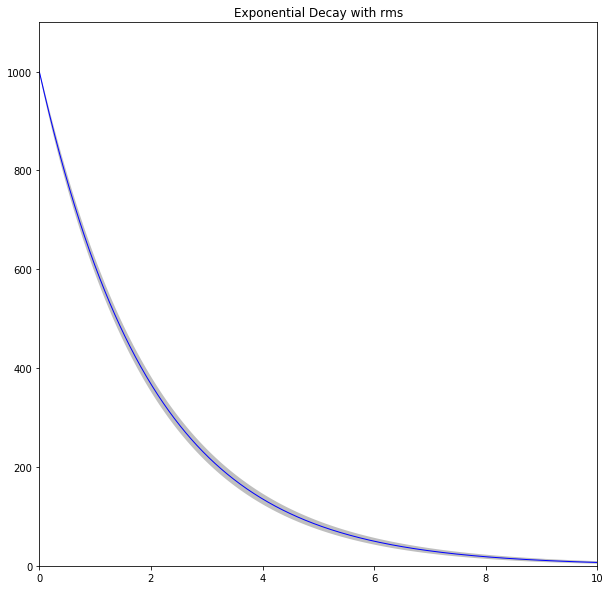

In [14]:
# declare the figure number and size
plt.figure(2, figsize=(10,10))

# make an instance of the rms_exp function we can call.
rms = rms_exp(A, c1, time_range)

# make the lower and upper bounds
upper = exp + rms
lower = exp - rms
plt.xlim(0, 10)
plt.ylim(0, 1100)
plt.title("Exponential Decay with rms")
plt.plot(time_range, exp, 'b', linewidth=1.0)
plt.fill_between(time_range, upper, lower, facecolor='grey', alpha=0.5)
#plt.plot(time_range, exp - rms, 'b', linewidth=1)
#plt.plot(time_range, exp + rms, 'b', linewidth=1)
plt.show()